In [1]:
import configparser
import os
import pickle

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

Populating the interactive namespace from numpy and matplotlib


In [3]:
config = configparser.ConfigParser()
config.read('config.ini')
tensor_dir = os.path.join(config['DEFAULT']['ProjectDirectory'], 'tensor/')

In [4]:
weight = 'log_freq'

In [5]:
stensor, index = pickle.load(open(os.path.join(tensor_dir, f'sparstensr_{weight}_100.pkl'), mode='rb'))
ktensor, fit, n_iterations, exectimes = pickle.load(open(os.path.join(tensor_dir, 
                                                                      f'ktensor_{weight}_100_256.pkl'), mode='rb'))

In [6]:
subj = pd.Series(index['nsubj'])

In [7]:
obj = pd.Series(index['dobj'])

In [8]:
vocab = list(subj.index & obj.index)

In [9]:
vocab = list(obj.index & subj.index)

In [10]:
subj_embed = ktensor.U[0][np.array([subj.loc[w] for w in vocab])]

In [11]:
obj_embed = ktensor.U[2][np.array([obj.loc[w] for w in vocab])]

In [12]:
regression = LinearRegression(n_jobs=-1)

In [13]:
regression.fit(subj_embed, obj_embed)

LinearRegression(n_jobs=-1)

In [14]:
diff = subj_embed.dot(regression.coef_)-obj_embed

In [17]:
diff_norm = np.apply_along_axis(np.linalg.norm, 1, diff)

In [25]:
[index['dobj'].inv[i] for i in np.argsort(-diff_norm)]

['',
 'I',
 'you',
 'we',
 'he',
 'they',
 'who',
 'that',
 'it',
 'she',
 'which',
 'people',
 'this',
 '-rrb-',
 'one',
 'i',
 'student',
 'company',
 'what',
 'user',
 'child',
 'team',
 'name',
 'woman',
 'man',
 'everyone',
 'result',
 'kid',
 'thing',
 'government',
 'system',
 'all',
 'these',
 'number',
 'guy',
 'player',
 'book',
 'God',
 'member',
 'family',
 'someone',
 'girl',
 'some',
 'person',
 'group',
 'study',
 'program',
 'other',
 'story',
 'anyone',
 'life',
 'staff',
 'game',
 'guarantee',
 'item',
 'fan',
 'product',
 'parent',
 'patient',
 'state',
 'country',
 'room',
 'business',
 'school',
 'customer',
 'many',
 'work',
 'owner',
 'article',
 'community',
 'time',
 'most',
 'site',
 'report',
 'problem',
 'friend',
 'applicability',
 'guest',
 'service',
 'place',
 'body',
 'activity',
 'each',
 'doctor',
 'possession',
 'teacher',
 'everything',
 'son',
 'chain',
 'experience',
 'boy',
 'dog',
 'employee',
 'police',
 'figure',
 'area',
 'market',
 'change',

In [26]:
index['dobj']

bidict({nan: 0, '': 1, 'it': 2, 'what': 3, 'they': 4, 'you': 5, '-lrb-': 6, 'use': 7, 'I': 8, 'that': 9, 'he': 10, 'time': 11, 'make': 12, '-rrb-': 13, 'one': 14, 'this': 15, 'information': 16, 'we': 17, 'post': 18, 'way': 19, 'change': 20, 'thing': 21, 'more': 22, 'something': 23, 'work': 24, 'place': 25, 'lot': 26, 'answer': 27, 'show': 28, 'people': 29, '$': 30, 'problem': 31, 'she': 32, 'game': 33, 'need': 34, 'question': 35, 'money': 36, 'anything': 37, 'number': 38, 'take': 39, 'name': 40, ',': 41, 'have': 42, 'experience': 43, 'job': 44, 'life': 45, 'point': 46, 'view': 47, 'issue': 48, 'link': 49, 'set': 50, 'service': 51, 'access': 52, 'support': 53, 'all': 54, 'datum': 55, 'idea': 56, 'book': 57, 'product': 58, 'call': 59, 'be': 60, 'comment': 61, 'look': 62, 'system': 63, 'which': 64, 'address': 65, 'some': 66, 'help': 67, 'story': 68, 'message': 69, 'home': 70, 'get': 71, 'part': 72, 'feature': 73, 'opportunity': 74, 'chance': 75, 'file': 76, 'value': 77, 'process': 78, 'se

In [18]:
regression.coef_.shape

(256, 256)

In [185]:
asymm = pd.Series(np.apply_along_axis(np.linalg.norm, 1, subj_embed - obj_embed),
                 index=vocab)

In [186]:
asymm.drop(np.nan, inplace=True)

/home/makrai/tool/python/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


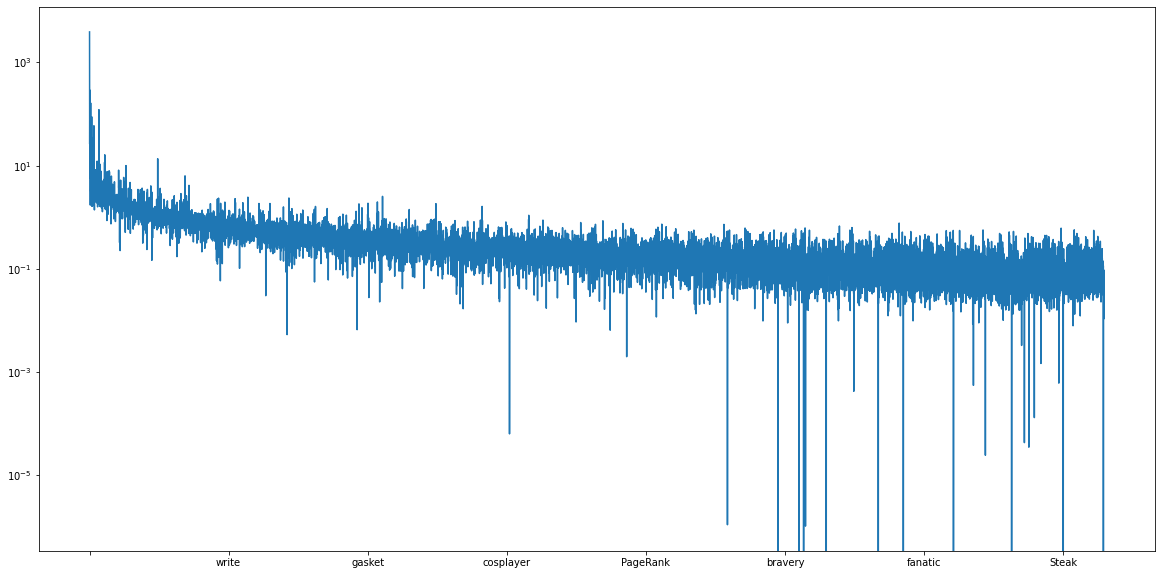

In [187]:
asymm.plot()#linewidth=1)
plt.yscale('log')

/home/makrai/tool/python/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


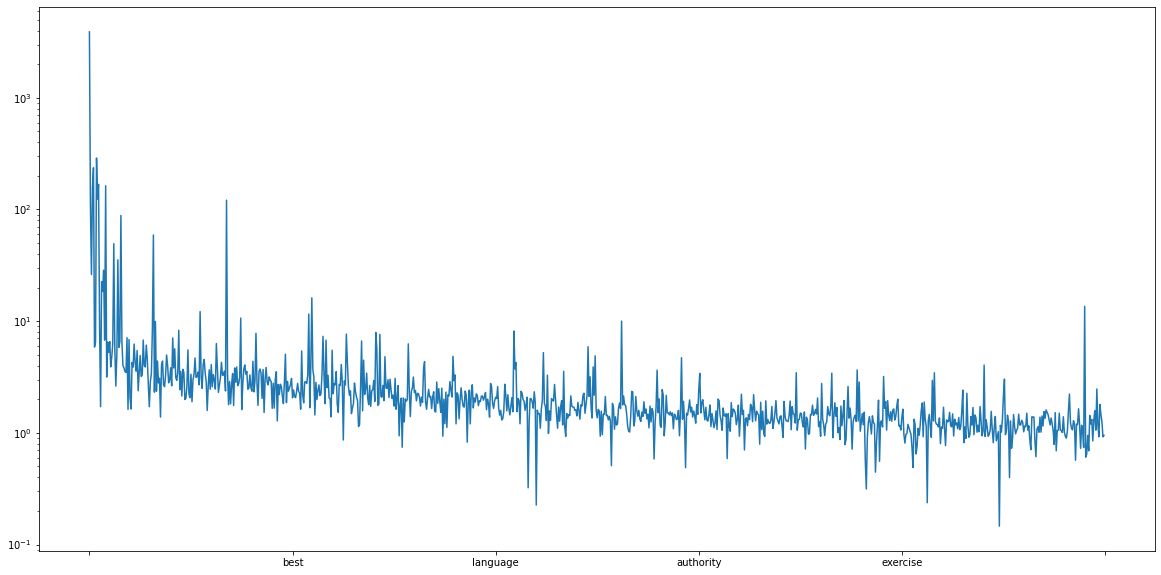

In [188]:
asymm.head(1000).plot()#linewidth=1)
plt.yscale('log')

/home/makrai/tool/python/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


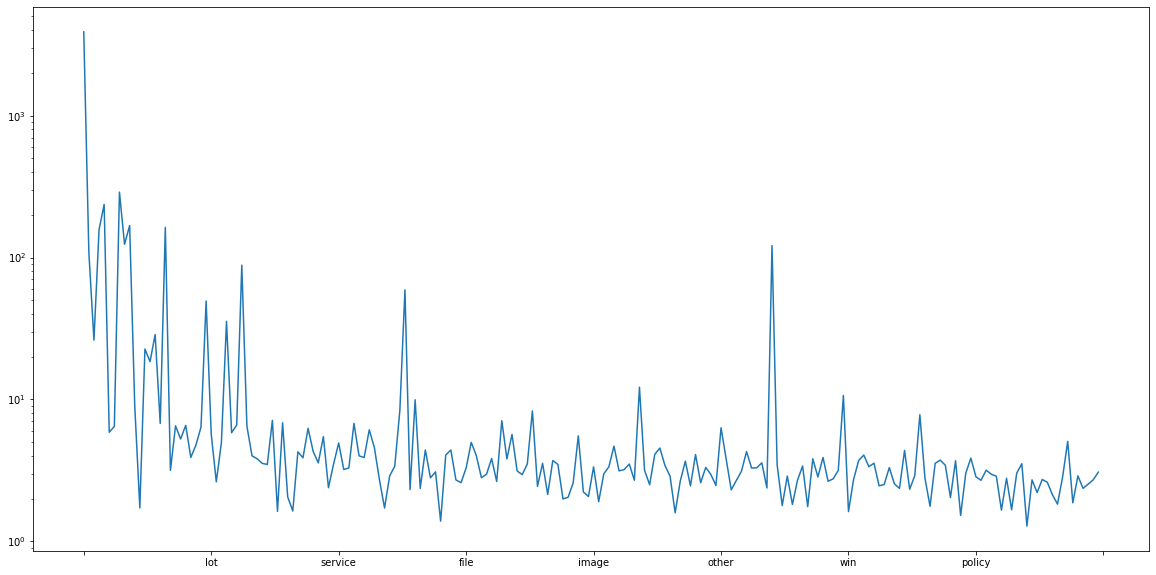

In [189]:
asymm.head(200).plot()#linewidth=1)
plt.yscale('log')

In [190]:
np.where(asymm>30)

(array([  0,   1,   3,   4,   7,   8,   9,  16,  24,  28,  31,  63, 135]),)

In [191]:
asymm[132:142]

yourself       3.294126
role           3.572334
advantage      2.373896
who          121.197881
hour           3.466896
copy           1.787191
detail         2.881074
lead           1.816999
material       2.697781
myself         3.394174
dtype: float64

In [192]:
index['nsubj']['year']

137

In [193]:
index['nsubj']['place']

138

In [194]:
index['nsubj']['staff']

139

In [195]:
index['dobj']['year']

175

In [196]:
index['dobj']['place']

25

In [197]:
index['dobj']['staff']

560

In [198]:
asymm[138]

2.881074197661581

In [199]:
asymm.index[138]

'detail'